In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import codecs
import json
import itertools
import operator
import nltk
from wordcloud import STOPWORDS

In [16]:
#Loading to a dictonary and creating a directed graph
with codecs.open("./Data/data_final.txt", 'r', "utf-8") as f:
    artist_data = json.load(f)

In [6]:
exceptions = []
for artist in artist_data:
    G.add_node(artist)
    try:
        for featured_artist in artist_data[artist][2]:
            if featured_artist in artist_data and featured_artist != artist:
                G.add_edge(artist, featured_artist)
    except:
        exceptions.append(artist)

In [7]:
exceptions

[]

In [8]:
#Calculating different statistics
indegree_distribution      = sorted((d for n, d in G.in_degree()), reverse=True)
outdegree_distribution     = sorted((d for n, d in G.out_degree()), reverse=True)
#undirectional_distribution = sorted((d for n, d in G_undirectional.degree()), reverse=True)
indegree_mean              = np.mean(indegree_distribution)
outdegree_mean             = np.mean(outdegree_distribution)
indegree_median            = np.median(indegree_distribution)
outdegree_median           = np.median(outdegree_distribution)
indegree_mode              = max(set(indegree_distribution), key=indegree_distribution.count)
outdegree_mode             = max(set(outdegree_distribution), key=outdegree_distribution.count)
indegree_min               = min(indegree_distribution)
outdegree_min              = min(outdegree_distribution)
indegree_max               = max(indegree_distribution)
outdegree_max              = max(outdegree_distribution)

In [32]:
G.in_degree

InDegreeView({'03 greedo': 29, 'buddy': 56, 'kenny beats': 35, 'chief keef': 130, 'pnb rock': 133, 'vince staples': 112, 'sada baby': 88, 'travis barker': 75, 'nef the pharaoh': 34, 'rich the kid': 140, 'yg': 242, 'key glock': 66, 'wiz khalifa': 354, 'og maco': 19, 'freddie gibbs': 129, 'problem': 89, 'yung bans': 22, 'omb peezy': 25, 'maxo kream': 43, '070 shake': 41, 'yandel': 55, 'kaytranada': 29, 'polo g': 99, 'the weeknd': 191, 'lil yachty': 211, '6lack': 140, 'big sean': 264, 'anderson .paak': 147, 'benee': 63, 'benny blanco': 30, 'anuel aa': 66, 'billie eilish': 94, 'skrillex': 62, 'j balvin': 208, 'k camp': 95, 'nle choppa': 157, 'megan thee stallion': 189, 'tion wayne': 113, 'lancey foux': 17, '1.cuz': 8, 'dani m': 18, 'stor': 14, 'cleo': 11, 'yasin': 17, 'stress': 24, 'jireel': 20, 'einár': 13, 'greekazo': 6, 'lil baby': 314, 'linda pira': 13, 'fricky': 12, 'dree low': 8, '100 kila': 1, 'rick ross': 345, '12 gauge': 2, 'snak the ripper': 23, 'getter': 9, 'napoleon': 32, 'jae 

In [9]:
print('Outdegree:', f'mean={outdegree_mean},', f'minimum={outdegree_min},', f'max={outdegree_max},', f'mode={outdegree_mode}')
print('Indegree:', f'mean={indegree_mean},', f'minimum={indegree_min},', f'max={indegree_max},', f'mode={indegree_mode}')

Outdegree: mean=29.530575539568346, minimum=0, max=218, mode=0
Indegree: mean=29.530575539568346, minimum=0, max=522, mode=0


In [7]:
indegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(indegree_distribution)])
outdegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(outdegree_distribution)])

In [33]:
def plot_degrees(x, y, title, xaxis, yaxis='Frequency (Count)', figsize=(10, 7)):
    plt.figure(figsize=figsize)
    plt.loglog(x, y, color='r', linestyle='None', markersize = 10.0, marker='o')
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

In [30]:
indegree_dist

{523: 1,
 403: 1,
 373: 1,
 354: 1,
 345: 1,
 336: 1,
 334: 1,
 314: 1,
 311: 1,
 304: 1,
 273: 1,
 268: 1,
 267: 1,
 264: 1,
 256: 1,
 255: 1,
 251: 1,
 248: 3,
 245: 1,
 242: 2,
 240: 2,
 239: 1,
 238: 1,
 237: 1,
 236: 1,
 233: 1,
 231: 1,
 230: 1,
 229: 1,
 228: 1,
 225: 1,
 223: 1,
 220: 3,
 218: 1,
 217: 1,
 216: 1,
 215: 2,
 213: 1,
 212: 1,
 211: 1,
 208: 1,
 207: 1,
 204: 2,
 203: 2,
 202: 1,
 201: 1,
 200: 1,
 199: 2,
 195: 1,
 194: 1,
 193: 1,
 191: 2,
 189: 1,
 187: 1,
 186: 2,
 184: 2,
 183: 1,
 181: 1,
 180: 1,
 178: 1,
 177: 1,
 174: 1,
 172: 2,
 171: 2,
 170: 1,
 169: 2,
 164: 2,
 163: 1,
 159: 1,
 157: 5,
 156: 3,
 154: 2,
 153: 3,
 152: 1,
 150: 2,
 149: 2,
 148: 4,
 147: 2,
 146: 1,
 145: 1,
 141: 1,
 140: 5,
 139: 1,
 138: 1,
 135: 1,
 133: 4,
 132: 3,
 131: 3,
 130: 2,
 129: 3,
 128: 3,
 126: 1,
 125: 1,
 124: 3,
 123: 1,
 122: 3,
 121: 4,
 120: 3,
 119: 3,
 118: 2,
 117: 1,
 116: 4,
 115: 2,
 114: 4,
 113: 2,
 112: 4,
 111: 6,
 110: 2,
 109: 2,
 108: 2,
 107: 3,
 

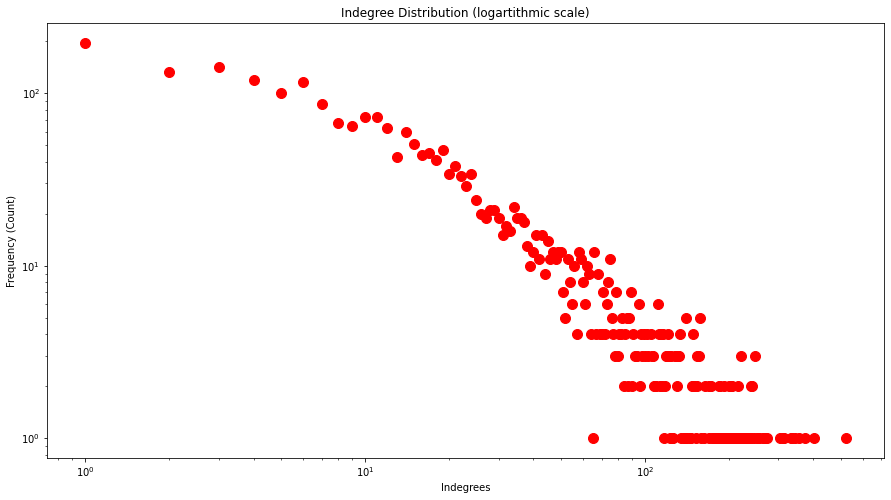

In [37]:
plot_degrees(indegree_dist.keys(), indegree_dist.values(), title='Indegree Distribution (logartithmic scale)', xaxis='Indegrees', figsize=(15, 8))

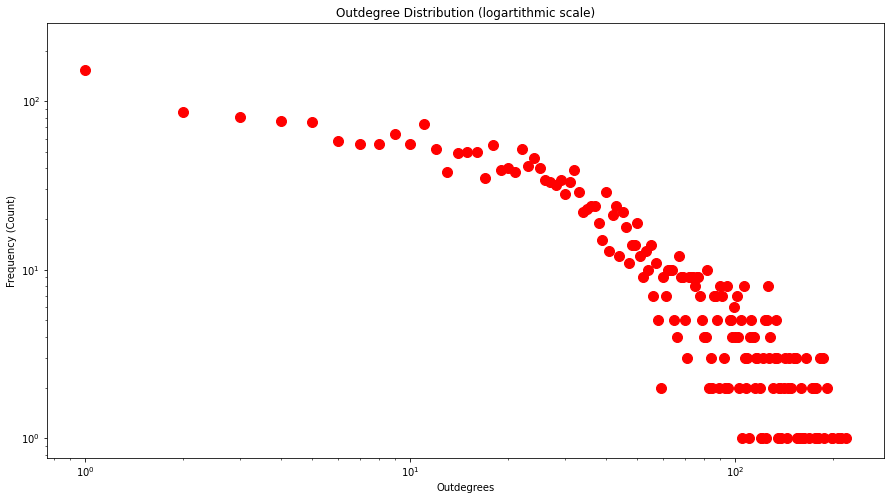

In [36]:
plot_degrees(outdegree_dist.keys(), outdegree_dist.values(), title='Outdegree Distribution (logartithmic scale)', xaxis='Outdegrees', figsize=(15, 8))

In [11]:
print(sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10])
print(sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10])


[('snoop dogg', 523), ('lil wayne', 403), ('gucci mane', 373), ('wiz khalifa', 354), ('rick ross', 345), ('busta rhymes', 336), ('2 chainz', 334), ('lil baby', 314), ('future', 311), ('e-40', 304)]
[("lil' cease", 219), ('mos def', 211), ('sheck wes', 207), ('treach', 199), ('rah digga', 198), ('memphis bleek', 191), ('i-20', 191), ('playboi carti', 187), ('inspectah deck', 186), ('slick rick', 186)]


We can see that Snoop Dogg has the highest centrality in terms of indegrees while lil cease seems to be the topper for the out degrees. We will now check some of the other centrality measures to see if they yield other interesting results.
To give a quick comment on the degree distribution - a quick look at Snoop Dogg shows that he is one of the all time greats and has been in the Hip Hop industry since the very beggining. It therefore makes sense that he is one of the most featured artists since he has been in the game the longest. 

In [160]:
#Betweness Centrality
betweness_centrality = nx.betweenness_centrality(G)

In [169]:
betweness_centrality
max_betweness_centrality = max(betweness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_betweness_centrality, betweness_centrality[max_betweness_centrality])

snoop dogg 0.0202858941299738


We can see that snoopdogg is the artist with the highest measure of betweness centrality. This means 

In [173]:
closeness_centrality = nx.closeness_centrality(G)
max_closeness_centrality = max(closeness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_closeness_centrality, closeness_centrality[max_closeness_centrality])

snoop dogg 0.44529846732870676


We can see that Snoop Dogg is again the hip hop artist with the highest closeness centrality. This means that Snoop Dogg is closest 

In [183]:
outdegree_dist[0]

222

In [38]:
import networkx.algorithms.community as nxcom

# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Count the communities
print(f"The graph has {len(communities)} communities.")

The graph has 220 communities.


In [12]:
graph_pos = nx.spring_layout(G)

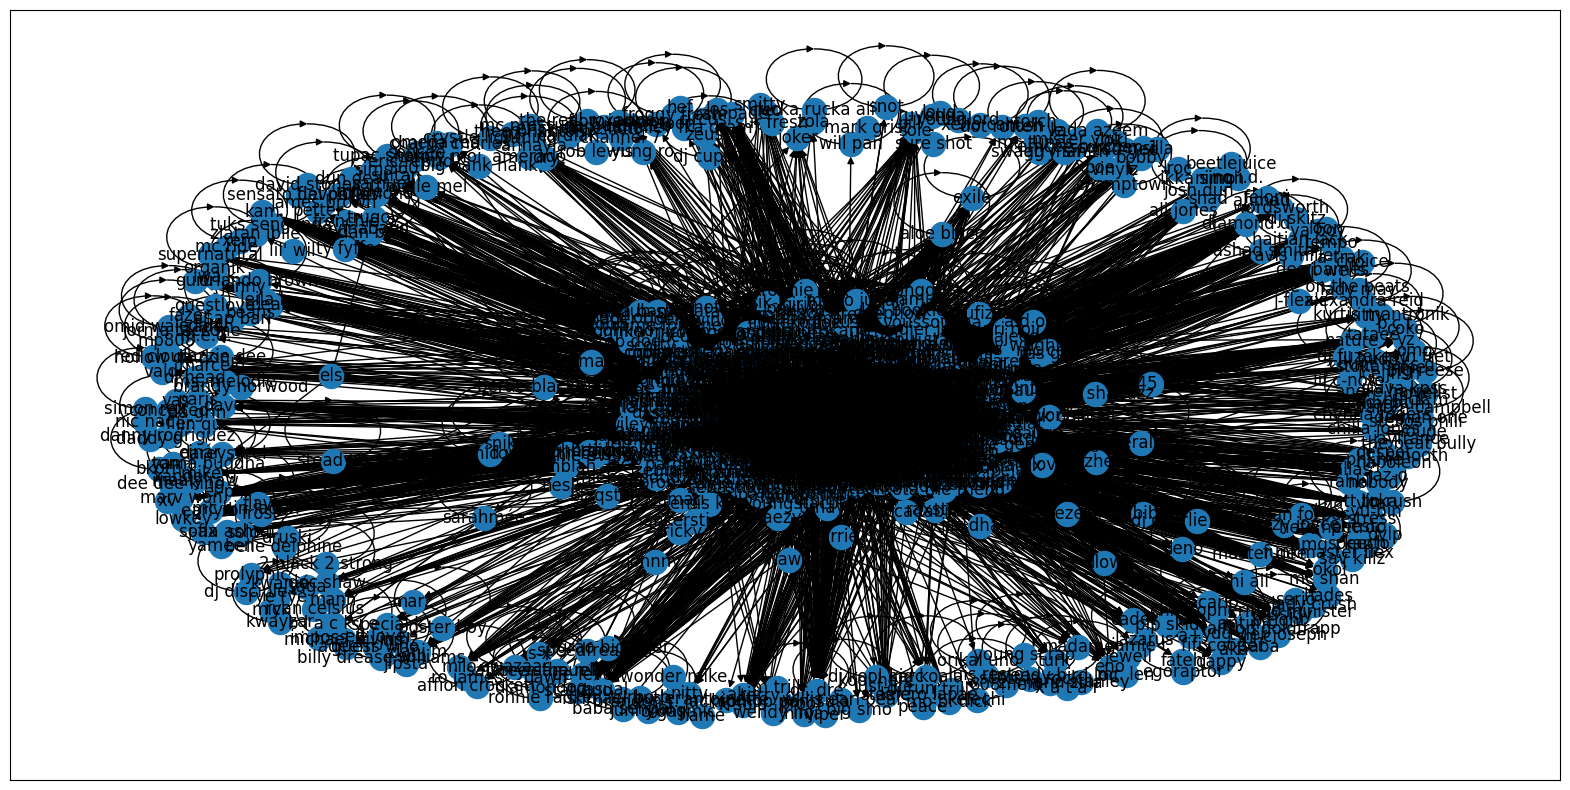

In [13]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(
        G,
        pos=graph_pos)

In [15]:
# Analysing the lyrics that we have so far and adding the most used words by an artist as a node attribute
with codecs.open("./Data/lyrics_best.txt", 'r', "utf-8") as f:
    lyrics = json.load(f)

In [18]:
len(lyrics.keys())

510

In [19]:
# NLP for the lyrics ------------------------------------------


top_words = {}

for artist in lyrics:
    # Removing the stop words from the lyrics
    text = [w for w in lyrics[artist] if w not in STOPWORDS]

    # Creating the frequency distribution
    fdist = nltk.FreqDist(text)

    # Getting the most common words in the distribution
    words = {}
    results = fdist.most_common()
    for i in range(15):
        if i < len(results):
            (w, _) = results[i]
            words["word"+str(i)] = w#.replace("'", "")
        else:
            break
    if len(words)>0:
        top_words[artist] = words

In [20]:
top_words

{'snoop dogg': {'word0': 'yeah',
  'word1': 'see',
  'word2': 'dogg',
  'word3': 'sho',
  'word4': 'em',
  'word5': 'right',
  'word6': 'love',
  'word7': 'snoop',
  'word8': 'lemme',
  'word9': 'wrong',
  'word10': 'booty',
  'word11': 'new',
  'word12': "'cause",
  'word13': 'wanna',
  'word14': 'think'},
 'lil wayne': {'word0': 'kit',
  'word1': 'ass',
  'word2': 'baby',
  'word3': 'trippy',
  'word4': 'got',
  'word5': 'shit',
  'word6': 'make',
  'word7': 'yeah',
  'word8': 'shake',
  'word9': 'wayne',
  'word10': 'new',
  'word11': 'clap',
  'word12': 'round',
  'word13': 'good',
  'word14': 'go'},
 'gucci mane': {'word0': 'money',
  'word1': 'got',
  'word2': 'keep',
  'word3': "callin'",
  'word4': 'much',
  'word5': 'nigga',
  'word6': 'ho',
  'word7': 'dancing',
  'word8': 'bitch',
  'word9': 'yeah',
  'word10': 'go',
  'word11': 'catch',
  'word12': 'might',
  'word13': 'let',
  'word14': 'box'},
 'e-40': {'word0': 'fried',
  'word1': 'gold',
  'word2': 'im',
  'word3': 'yel

In [4]:
# Graph construction -----------------------------------------

G = nx.DiGraph()

exceptions = []
for artist in artist_data:
    G.add_node(artist)
    try:
        for featured_artist in artist_data[artist][2]:
            if featured_artist in artist_data and featured_artist != artist:
                G.add_edge(artist, featured_artist)
    except:
        exceptions.append(artist)
        
#nx.set_node_attributes(G, top_words)

In [22]:
nx.nodes(G)["lil mosey"]

{'word0': 'yeah',
 'word1': 'bitch',
 'word2': 'back',
 'word3': 'nigga',
 'word4': 'know',
 'word5': 'mmm',
 'word6': 'got',
 'word7': 'now',
 'word8': 'see',
 'word9': 'bust',
 'word10': 'wanna',
 'word11': 'us',
 'word12': 'uh',
 'word13': 'bands',
 'word14': 'skrrt'}

In [27]:
# Sentiment analysis ---------------------------------------------

import re

# Storing the sentiment values of words from the labMT wordlist
happiness = {}

with open('./Data/labMT.txt') as f:
    for w, h in re.findall(r'([a-z]+)\t\d+\t([\d.]+)', f.read()):
        happiness[w] = float(h)

'''
That way we have a value reference (the labMT word list):
    - 8.50 is the highest
    - 1.30 is the lowest
'''

# This functions computes the total happiness of a text given its FreqDist "fd", and the word list "happiness"
def computeHappiness(fd):
    h = 0
    nb_words_recognized = 0
    for w in fd:
        # We use a try-except structure here because some words don't have a happiness value
        try:
            # We just weigh the value by the word's frequency
            h += (happiness[w] * fd[w])
            # We count how many words are recognized because we will use this to normalize the result
            nb_words_recognized += fd[w]
        except KeyError:
            pass
    return h, nb_words_recognized

# This is the part that computes the happiness for every character of the graph (for which at least one word was recognized)

artists_happiness = {}
for artist in lyrics:
    
    # Removing the stop words from the lyrics
    text = [w for w in lyrics[artist] if w not in STOPWORDS]

    # Creating the frequency distribution
    fd = nltk.FreqDist(text)
    
    h, l = computeHappiness(fd)
    # If not a single word was recognized, it's useless
    if l > 0:
        artists_happiness[artist] = (h/l)

In [34]:
(min(artists_happiness.values()) - 1.3)/8.5

0.4399606651171112

In [25]:
# Degrees from the graph -----------------------------
import csv
artists_degrees = {}
with open('Data/artists_degrees.csv', newline='') as csvfile:
    line = csv.reader(csvfile)
    i = 0
    for row in line:
        if i == 0:
            i += 1
            pass
        else:
            artists_degrees[row[1]] = int(row[21])

In [27]:
artists_degrees['snoop dogg']

615

In [6]:
import community

H = G.to_undirected()

# Using the Louvain algorithm implemented in the community package to compute the best partition
partition = community.best_partition(H)
print(len(set(partition.values())), "communities found.")

modularity = community.modularity(partition, H)
print("Modularity =", modularity)

160 communities found.
Modularity = 0.37837141834626986


In [12]:
communities = {}

for i in range(max(partition.values())+1):
    communities[i] = []

for artist in partition:
    communities[partition[artist]].append(artist)

In [30]:
for i in communities:
    if len(communities[i]) > 1:
        print("Community", i, ":", len(communities[i]), "artists")
        text = []
        degree_count = 0
        degree = 0
        for artist in communities[i]:
            try:
                text += lyrics[artist]
            except:
                pass
        for artist in communities[i]:
            try:
                degree += artists_degrees[artist]
                degree_count += 1
            except:
                pass
            
        if degree_count>0:
            print("Average degree:", degree/degree_count)
            
        # Removing the stop words from the lyrics
        text = [w for w in text if w not in STOPWORDS]

        # Creating the frequency distribution
        fdist = nltk.FreqDist(text)
        
        print(' '.join([w for (w, _) in fdist.most_common()[:20]]))
        print(" ")

Community 0 : 615 artists
Average degree: 80.11475409836065
yeah got know nigga ain't bitch shit niggas now fuck go back love might see want wanna money one never
 
Community 1 : 334 artists
Average degree: 54.97597597597598
got nigga niggas ain't know shit fuck bitch now yeah one back see ya man make money might keep let
 
Community 2 : 670 artists
Average degree: 60.123880597014924
got niggas know nigga now shit ain't yeah see back man one make might fuck go time yo 'em cause
 
Community 4 : 376 artists
Average degree: 80.83827493261455
know got nigga yeah ain't now niggas shit go see back fuck baby oh make love might one bitch ya
 
Community 5 : 116 artists
Average degree: 99.31304347826087
got know ain't yeah now go shit wanna nigga niggas see back ya make fuck love man baby might one
 
Community 7 : 269 artists
Average degree: 29.09163346613546
que de y yo la ey te mí es se el eh lo bien qué en pero le si por
 
Community 8 : 138 artists
Average degree: 27.8768115942029

 
Communit

In [20]:
communities[7]

['yandel',
 'benny blanco',
 'anuel aa',
 'j balvin',
 '1.cuz',
 'dani m',
 'cleo',
 'yasin',
 'stress',
 'jireel',
 'einár',
 'greekazo',
 'linda pira',
 'fricky',
 'dree low',
 'boy wonder',
 '20syl',
 'sefyu',
 'orelsan',
 'seth gueko',
 'lomepal',
 'nessbeal',
 'salif',
 'youssoupha',
 'booba',
 'disiz',
 'hamza',
 'kaaris',
 'ninho',
 'demon one',
 'dry',
 'oxmo puccino',
 'gims',
 'médine',
 'sinik',
 'sofiane',
 'bia',
 'kool savas',
 'ceza',
 'azad',
 'abraham mateo',
 'farid bang',
 'tainy',
 'mariah angeliq',
 'plan b',
 'capo',
 'becky g',
 'daddy yankee',
 'nicky jam',
 'ozuna',
 'tego calderón',
 'dardan',
 'myke towers',
 'eno',
 'de la ghetto',
 'ñengo flow',
 'bad bunny',
 'hatik',
 'dinos',
 'nekfeu',
 'a.chal',
 'darell',
 'manuel turizo',
 'wisin',
 'mala rodríguez',
 'khea',
 'duki',
 'cazzu',
 'petter',
 'farruko',
 'jon z',
 'taktloss',
 'adán zapata',
 'mc davo',
 'ajs nigrutin',
 'maska',
 'general woo',
 'edo maajka',
 'marčelo',
 'wikluh sky',
 'akhenaton',
 '

In [23]:
nx.write_gml(G, "gml_graph2.gml")